Tutorial [here](http://nbviewer.jupyter.org/github/kwinkunks/notebooks/blob/master/Matteo_colourmaps.ipynb) about how to reverse to go from cmap to lup format

### Export LUP files (colorbar)

In [90]:
%pylab inline
import numpy as np
import os

Populating the interactive namespace from numpy and matplotlib


In [91]:
def reverse_colourmap(cmap):
    reverse = []
    for channel in cmap:
        data = []
        for t in channel:
            data.append((1 - t[0], t[1], t[2]))
        reverse.append(sorted(data))
        
    return reverse

In [92]:
cmap = matplotlib.cm.get_cmap('gist_rainbow')

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

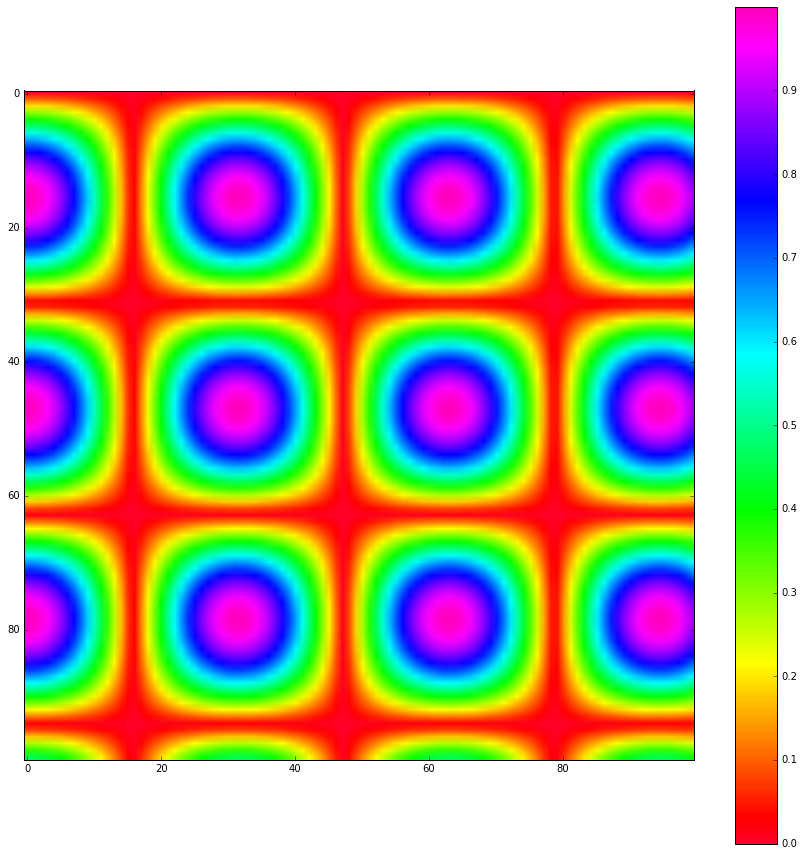

In [95]:
x = np.arange(0, 10, 0.1)
y = np.arange(0, 10, 0.1)
X, Y = np.meshgrid(x,y)
z = np.abs(np.cos(X) * np.sin(Y))

plt.figure(figsize=(15,15))
plt,imshow(z, cmap=cmap)
plt.colorbar()


In [96]:
rgb = []
for _index in range(0, 256):
    rgb.append(list(cmap(_index)))

In [47]:
#print(rgb)

## produce LUT file 

In [97]:
filename = "/Users/j35/Desktop/gist_rainbow.lut"

In [98]:
file = open(filename, 'w')
file.write('; Color look up table\n')
file.write('\n')

1

In [99]:
max_value = 255
for _index in range(0, max_value+1):
    _intensity = _index / float(max_value)
    _line = "%f %f %f %f\n" %(_intensity, cmap(_index)[0], cmap(_index)[1], cmap(_index)[2])
    file.write(_line)
file.close()